<a href="https://colab.research.google.com/github/r-rahulsingh/SimpleImageRetrieval/blob/main/Simple_Color_Image_Retrieval_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Color Image Retrieval System


### Question1


    Computed a 256-bin HSV color histogram for an input image.
    Parameters:  Im (numpy.ndarray): Input image in BGR format (OpenCV default).
    Returns: Hist (numpy.ndarray): Normalized 256-bin histogram (1D array).

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Cal256binHSV(Im):
    hsv_image = cv2.cvtColor(Im, cv2.COLOR_BGR2HSV)
    hist = np.zeros((16, 4, 4), dtype=np.float32)
    H = hsv_image[:, :, 0] // 16
    S = hsv_image[:, :, 1] // 64
    V = hsv_image[:, :, 2] // 64
    for h, s, v in zip(H.flatten(), S.flatten(), V.flatten()):
        hist[int(h), int(s), int(v)] += 1
    Hist = hist.flatten()
    Hist /= np.sum(Hist)
    return Hist

### Question2

In [ ]:
image_files = ["/content/Elephant1.jpg", "/content/Elephant2.jpg", "/content/Horse1.jpg", "/content/Horse2.jpg"]

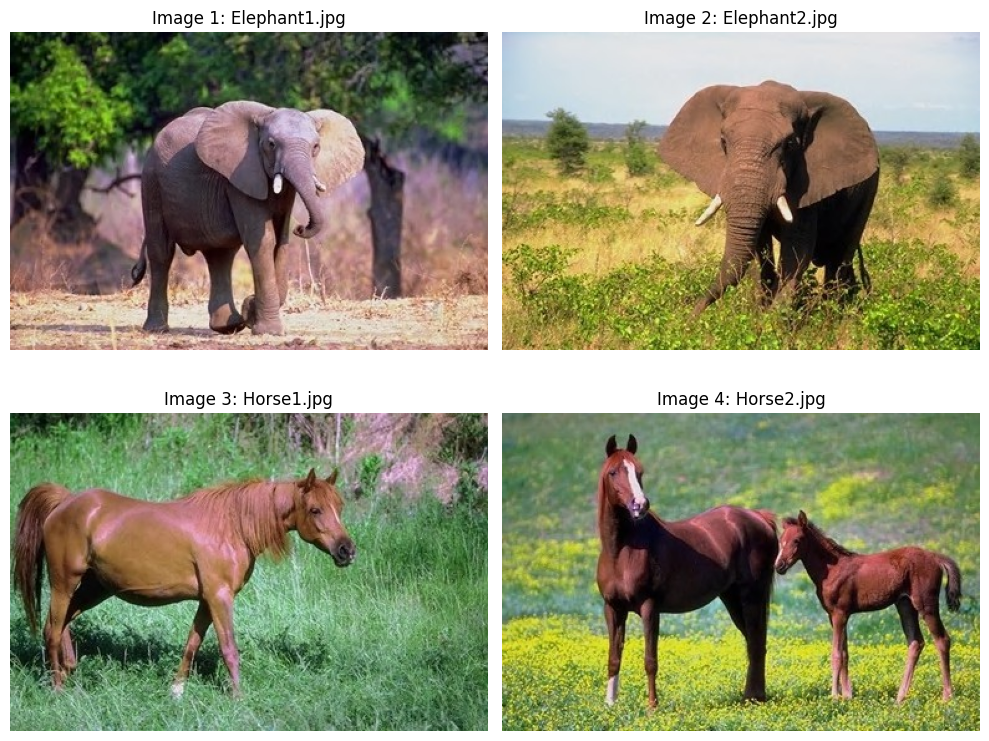

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
for i, image_file in enumerate(image_files):
    image = cv2.imread(image_file)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i + 1)
    plt.imshow(image_rgb)
    plt.title(f"Image {i + 1}: {image_file.split('/')[-1]}")  # Extract and display filename
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def histogram_intersection(h, g):
    intersection = np.sum(np.minimum(h, g))
    normalization = min(np.sum(h), np.sum(g))
    return intersection / normalization

In [ ]:
image_histograms = {}
for image_file in image_files:
    image = cv2.imread(image_file)
    image_histograms[image_file] = Cal256binHSV(image)

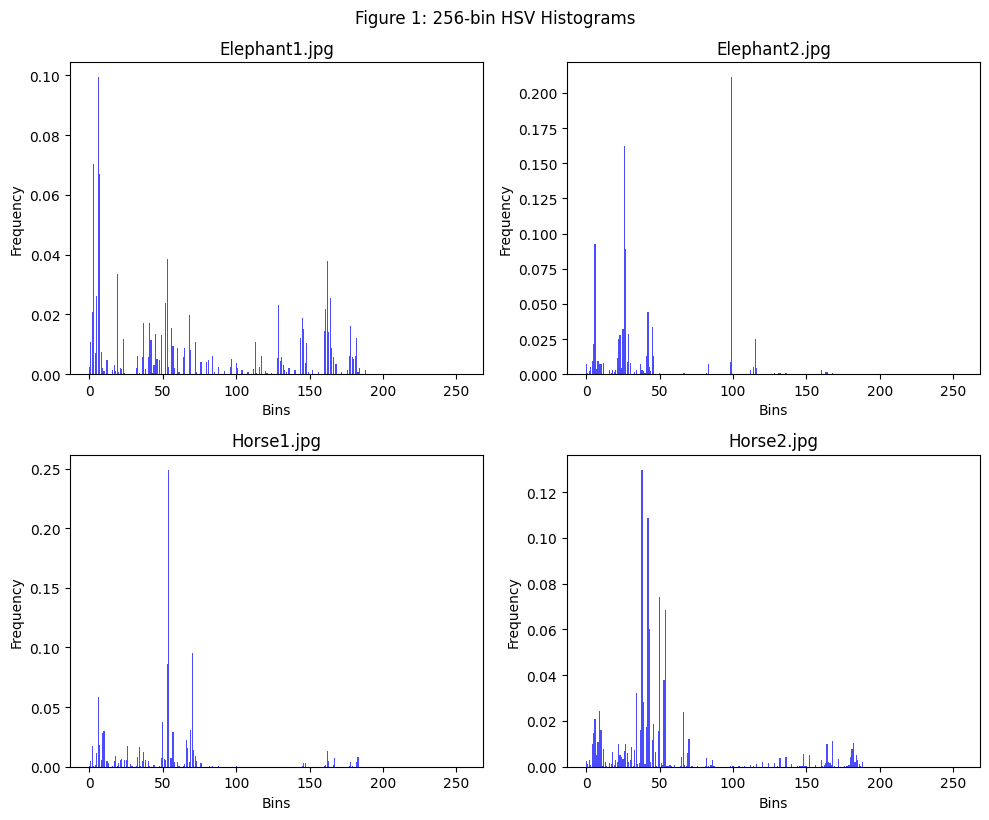

In [ ]:
plt.figure(figsize=(10, 8))
for i, (image_file, hist) in enumerate(image_histograms.items()):
    plt.subplot(2, 2, i + 1)
    plt.bar(range(256), hist, color='blue', alpha=0.7)
    base_filename = os.path.basename(image_file)
    plt.title(base_filename)
    plt.xlabel("Bins")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.suptitle("Figure 1: 256-bin HSV Histograms", y=1.02)
plt.show()

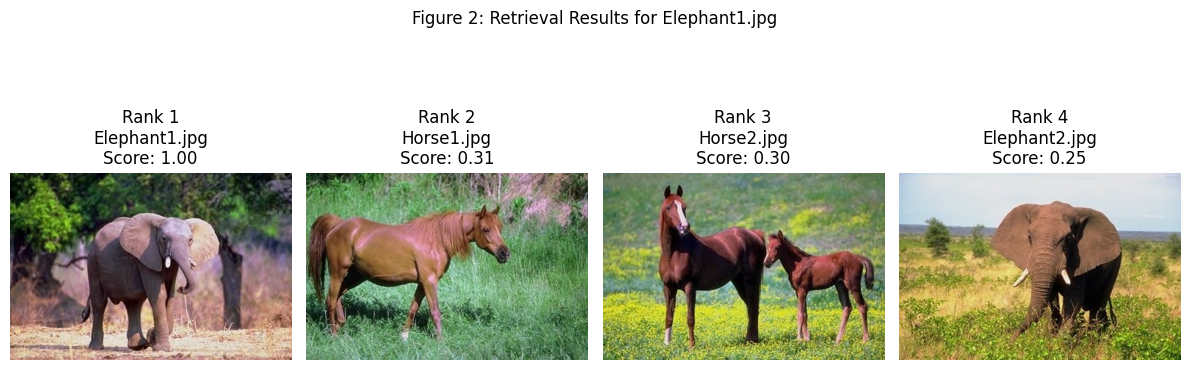

--------------------------------------------------------------------------------------------------------------------------------------------


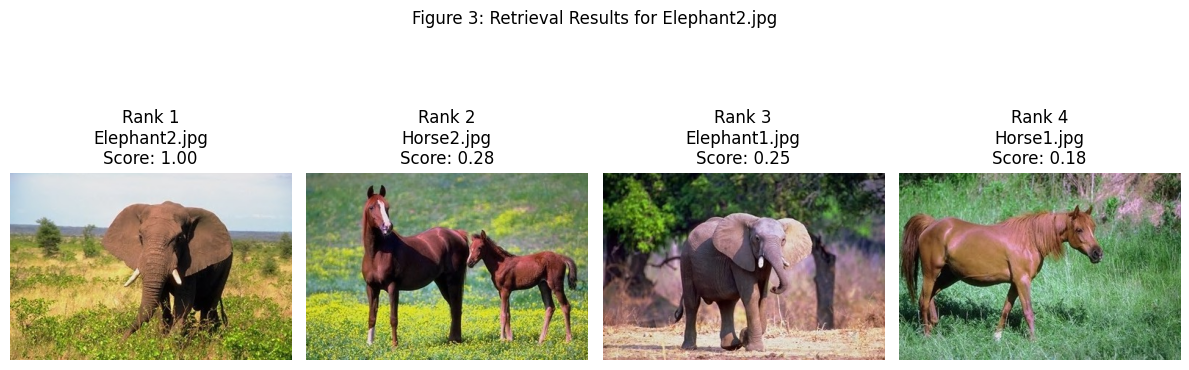

--------------------------------------------------------------------------------------------------------------------------------------------


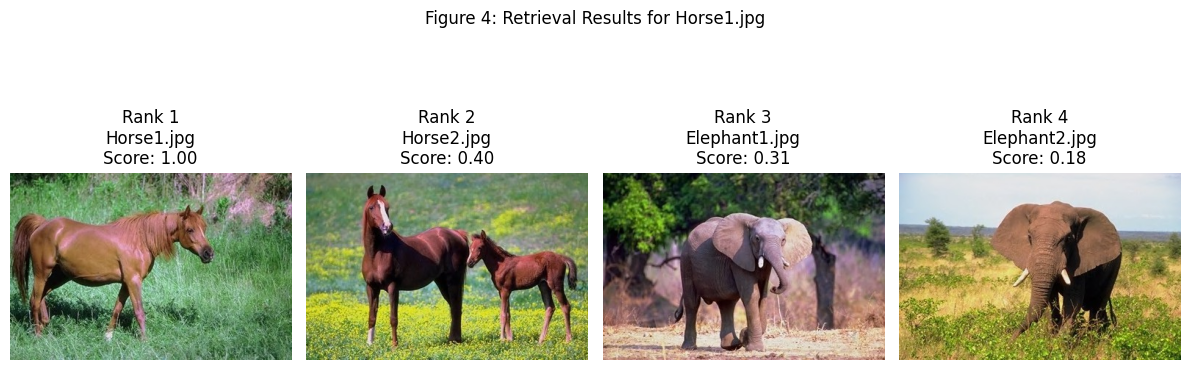

--------------------------------------------------------------------------------------------------------------------------------------------


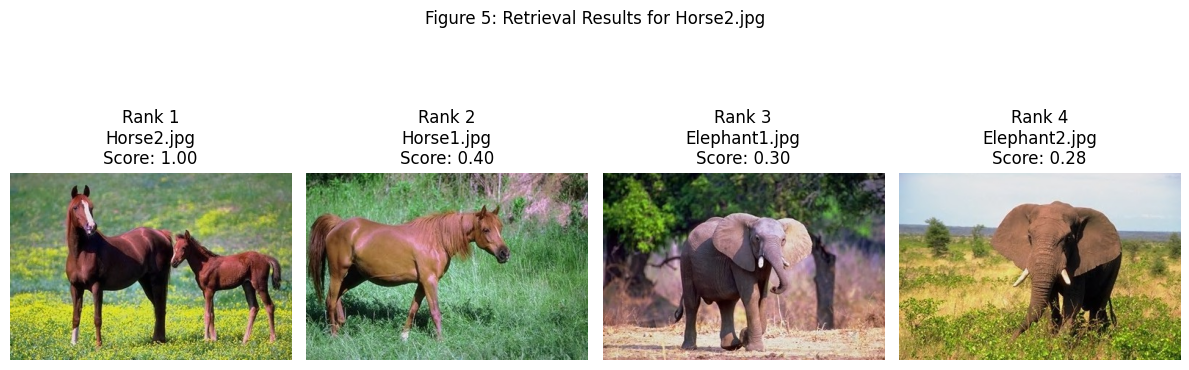

--------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for query_image in image_files:
    query_hist = image_histograms[query_image]
    scores = []
    for target_image, target_hist in image_histograms.items():
        score = histogram_intersection(query_hist, target_hist)
        scores.append((target_image, score))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    plt.figure(figsize=(12, 6))
    for rank, (image_file, score) in enumerate(scores):
        image = cv2.imread(image_file)
        base_filename = os.path.basename(image_file)
        plt.subplot(1, 4, rank + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Rank {rank + 1}\n{base_filename}\nScore: {score:.2f}")
        plt.axis('off')
    query_base_filename = os.path.basename(query_image)
    plt.suptitle(f"Figure {2 + image_files.index(query_image)}: Retrieval Results for {query_base_filename}", y=0.9)
    plt.tight_layout()
    plt.show()
    print("--" * 70)